2.3.1
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4988 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3777 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3357 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3147 - accuracy: 0.8835
Epoch 5/5
313/313 [==============================] - 0s 690us/step - loss: 0.3350 - accuracy: 0.8801
Test accuracy: 0.8801000118255615
(28, 28)
(1, 28, 28)
[[1.1121949e-05 2.0569249e-09 1.1478762e-07 9.5293684e-10 6.9070825e-07
  3.2492686e-02 3.0139449e-06 1.3456983e-02 1.1577980e-06 9.5403421e-01]]


9

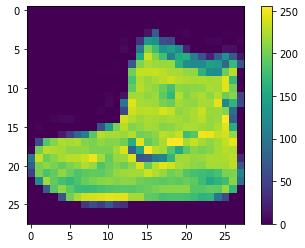

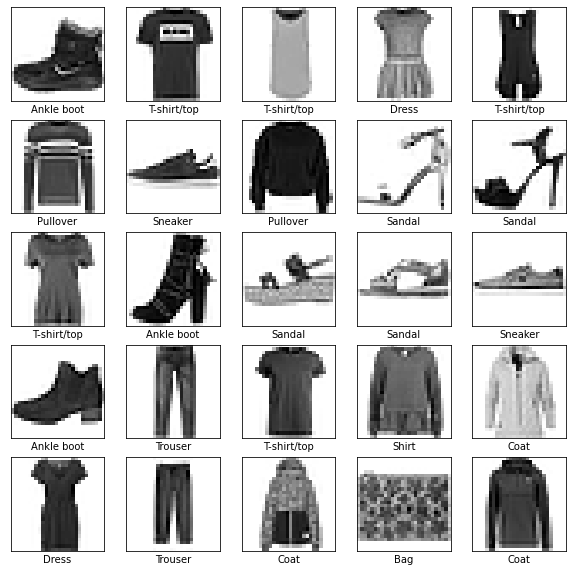

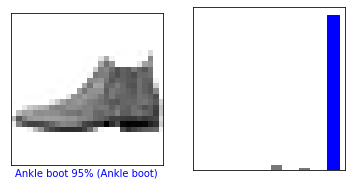

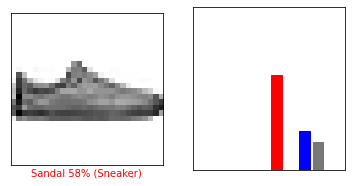

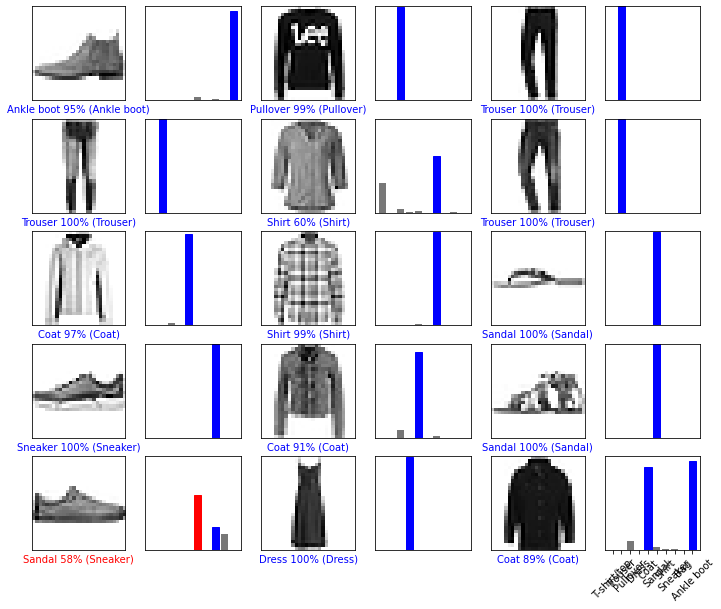

In [27]:
# importing tensorflow and keras from tensorflow

import tensorflow as tf
from tensorflow import keras

#other maths libraries

import numpy as np
import matplotlib.pyplot as plt

# printing tensor flow version
print(tf.__version__)


#+++++++++++++++++++++++++++++importing the data set of fashion mnist dataset++++++++++++++++++++++++++++++

#Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

#print(fashion_mnist)

#Loading the dataset returns four NumPy arrays:
#The train_images and train_labels arrays are the training set—the data the model uses to learn.
#The model is tested against the test set, the test_images, and test_labels arrays.
#The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the #class of clothing the image represents:

#Label	Class
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot
#Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#++++++++++++++++++++++++++++++++Exploring data know about data+++++++++++++++++++++++++++++++++++

#shape of train images
train_images.shape
#length of labels
len(train_labels)

train_labels

#test images shape
test_images.shape
# length of test labels
len(test_labels)

test_labels

#+++++++++++++++++++++++++++++++++PRE PROCESSING DATA+++++++++++++++++++++++++++++++++++++++++++++

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

#We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

#It's important that the training set and the testing set are preprocessed in the same way:

#+++++++++++++++coverting from int to float+++++++++

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))

for i in range(25):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

#Building the neural network requires configuring the layers of the model, then compiling the model.++++++++mdodel building++++++++

#+++++++++++++++++++++++++++++++++++++Building neural net setting up on layers++++++++++++++++++++++++++++++++++++++++++++++++

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
    
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++ Compile the model++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

#Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
#Optimizer —This is how the model is updated based on the data it sees and its loss function.
#Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


model.compile(optimizer=tf.optimizers.Adam(), 
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    #tf.train.AdamOptimizer() => tf.optimizers.Adam() *IMPORTANT*
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++Training model++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#Training the neural network model requires the following steps:

#Feed the training data to the model—in this example, the train_images and train_labels arrays.
#The model learns to associate images and labels.
#We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.
#To start training, call the model.fit method—the model is "fit" to the training data:


model.fit(train_images, train_labels, epochs=5) # here ephocs is like no of iterations


#+++++++++++++++++++++++++++++++++++++++++++++++Evaluate accuracy+++++++++++++++++++++++++++++
#compare how the model performs on the test dataset:

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

 #The accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.
    
    
#++++++++++++++++++++++++++++++++++++++++++++++++++Make predictions++++++++++++++++++++++++++++++++++++++++++++++++++

#With the model trained, we can use it to make predictions about some images.

predictions = model.predict(test_images)

# The model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

predictions[0]

# A prediction is an arraytest_labels[0] of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value in output.



np.argmax(predictions[0])

#The model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

test_labels[0]


#++++++++++++++++++++++++++++++++++++++++++++++++++++++plotting++++++++++++++++++++++++++++++++++++++++++
#We can graph this to look at the full set of 10 channels

#plotting image 

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    
    
# o th image prediction array    
    

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

#12 th image prediction

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


#Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.


# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    
#Finally, use the trained model to make a prediction about a single image.

img = test_images[0]

print(img.shape)

#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


#predict the image:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

#model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:
np.argmax(predictions_single[0])